# Question 2:

## Cross Validation

#### Cross validation is a method which we can use to check how good model is before applying actual test data. We divide the whole data set into train and test data generally. But we can never know how good model is before applying the test data. So to overcome this problem we take some data from the training data and once the model is trained we check it across the trained model. Hence we can get an idea about avoid overfitting and performance for unseen data.

#### K-fold cross validation: Here we divide the whole dataset into the k subset and take one of the k subsets as a test data and take remaining k-1 data as training set and we repeat this procedure k times. Then we take the average of accuracy from all k times. The main benefit is that data divided randomly hence each time test and train data will be different. so we can tell about model performance and how it can perform for unseen data.

Importing modules and reading data

In [1]:
from random import seed
import numpy as np
from random import randrange
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns

iris_data = np.loadtxt('iris.data',delimiter=',')

Cross validation function which return train and test data set
which takes dataset and fold value i.e k values as an input and divide it randomly

In [2]:
def cross_validation(dataset, folds):
    trainDataset = []
    tempDataset = list(dataset)
    
    # foldsize
    foldSize = int(len(dataset) / folds)
    
    for number in range(folds):
        fold = []
        while len(fold) < foldSize:
            datasetIndexNumber = randrange(len(tempDataset))
            fold.append(tempDataset.pop(datasetIndexNumber))
            
        trainDataset.append(fold)
       
    if len(dataset) % int(folds) == 0:
        testDataset = trainDataset[-1:]
        trainDataset.pop(-1)
        
    return trainDataset, testDataset

setting cross-validation value to 10

In [3]:
seed()
count = 0
SVM_Values, RF_Values = [], []
cv = 10     # 10 fold cross validation

This while loop run it based on cross validation value. Inside it will build the model and predict the values for SVM and RFC and will store it further for getting average.

In [4]:
while count < cv:
    
    # cross validation fucntion
    trainDataset, testDataset = cross_validation(iris_data, cv)

    # data transformation
    tempTrainData = [item for sublist in trainDataset for item in sublist]
    tempTestData = [item for sublist in testDataset for item in sublist]
    
    trainDataset = np.array(tempTrainData)
    testDataset = np.array(tempTestData)
    
    # divide test and train set 
    x_train = trainDataset[:,0:-1]
    y_train = trainDataset[:,-1]
    
    x_test = testDataset[:,0:4]
    y_test = testDataset[:,4]
    
    # model
    SVM_Model = svm.SVC(kernel='linear')
    RF_Model = RandomForestClassifier(n_estimators=10)
    
    # training the model
    SVM_Model.fit(x_train,y_train)
    RF_Model.fit(x_train,y_train)
    
    # prediction
    y_predicted_SVM = SVM_Model.predict(x_test)
    y_predicted_RF = RF_Model.predict(x_test)
    
    # storing predicted values for getting mean
    SVM_Values.append(np.mean(y_test == y_predicted_SVM))
    RF_Values.append(np.mean(y_test == y_predicted_RF))

    count = count + 1

Mean of stored values for finding accuracy

Percentage correct (accuracy) of SVM :  0.9800000000000001
Percentage correct (accuracy) of RFC :  0.9666666666666668


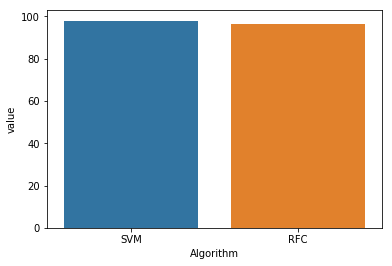

In [5]:
y_predicted_SVM_values = sum(SVM_Values) / cv
y_predicted_RF_values = sum(RF_Values) / cv

# plotting the graph
dataFrame = pd.DataFrame(data={'Algorithm': ['SVM','RFC'],
      'Accuracy':[(y_predicted_SVM_values * 100), (y_predicted_RF_values * 100)]})
tempDataFrame = pd.melt(dataFrame,id_vars = ['Algorithm'],value_vars =['Accuracy'])
my_plot = sns.barplot(x="Algorithm", y="value", data=tempDataFrame)

#evaluation
print('Percentage correct (accuracy) of SVM : ', y_predicted_SVM_values)
print('Percentage correct (accuracy) of RFC : ', y_predicted_RF_values)

Here, For this problem, SVM is better than Random Forest